# **Predict Passowrd Strength Using Natural Language Processing**

## **Project Introduction**
Project Introduction: Predicting Password Strength Using NLP

In the digital age, passwords act as the first line of defense for personal and organizational security. However, many users tend to create weak passwords that are easy to guess or crack, making accounts vulnerable to cyberattacks. Ensuring strong password creation is therefore critical for safeguarding sensitive information.

This project focuses on predicting the strength of a password using Natural Language Processing (NLP) techniques. Passwords, although short, are textual sequences that can be analyzed using NLP methods similar to those used for analyzing documents and text data. By converting passwords into numerical representations (feature vectors) and training machine learning models, it is possible to classify passwords as weak, normal, or strong.

# **Problem Statement**

In today’s digital environment, the security of online accounts heavily depends on the strength of user passwords. Despite this, many users continue to create weak or easily guessable passwords, which increases the risk of unauthorized access, data breaches, and cyberattacks. Traditional password rules (such as minimum length or inclusion of special characters) are not sufficient, as users often find ways to bypass them while still creating weak passwords.

The problem addressed in this project is: **how to automatically assess and predict the strength of a password based on its textual characteristics using machine learning and natural language processing (NLP) techniques.**

The solution aims to classify passwords into categories such as **weak, normal, or strong**, enabling real-time feedback for users to create secure passwords. This requires:

* Extracting meaningful features from passwords using NLP and character-level analysis.
* Training a machine learning model to recognize patterns that indicate password strength.
* Evaluating the model to ensure reliable and accurate predictions on unseen passwords.

By solving this problem, the system can enhance cybersecurity by guiding users to adopt strong passwords and reducing the likelihood of account compromises.


# **Project Objective**

The main objective of this project is to **develop a machine learning system that can automatically predict the strength of passwords using Natural Language Processing (NLP) techniques**. Specifically, the project aims to:

1. **Analyze and preprocess password data** to extract meaningful features such as length, character composition, entropy, and character-level patterns.
2. **Transform password text into numerical representations** using NLP methods like TF-IDF vectorization and character-level n-grams.
3. **Train and evaluate a machine learning model** (e.g., Logistic Regression) to classify passwords into categories: weak, normal, or strong.
4. **Implement a prediction function** that provides real-time feedback on password strength to users.
5. **Provide insights into common password patterns and weaknesses**, enabling better understanding and guidance for creating secure passwords.

The ultimate goal is to **enhance cybersecurity** by helping users generate strong passwords and prevent potential account compromises.


# **1.0 Import Libraries**

In [1]:
import sqlite3

In [2]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2.0 Load Dataset**

In [3]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r"/content/drive/MyDrive/password_data.sqlite")

In [4]:
#### check online its table name on https://sqliteonline.com/
data = pd.read_sql_query("SELECT * FROM Users" , con)

# **3.Initial Data Exploration**

##**3.1 Display first few rows**

In [5]:
df = data

In [6]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


## **3.2 Dataset shape**

In [7]:
# Dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 100000 rows and 3 columns.


## **3.3 Column names and types**

In [8]:
# Column names and types
print("\nColumn data types:")
print(df.dtypes)


Column data types:
index        int64
password    object
strength     int64
dtype: object


## **3.4 Check for missing values**

In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
index       0
password    0
strength    0
dtype: int64


## **3.5  Descriptive Statistics**

In [10]:
print("\nDescriptive statistics for numeric columns:")
print(df.describe())


Descriptive statistics for numeric columns:
               index       strength
count  100000.000000  100000.000000
mean    49999.500000       0.988730
std     28867.657797       0.510926
min         0.000000       0.000000
25%     24999.750000       1.000000
50%     49999.500000       1.000000
75%     74999.250000       1.000000
max     99999.000000       2.000000


## **3.7 Inspect Target Variable**


Target variable distribution:
strength
1    73883
0    13622
2    12495
Name: count, dtype: int64


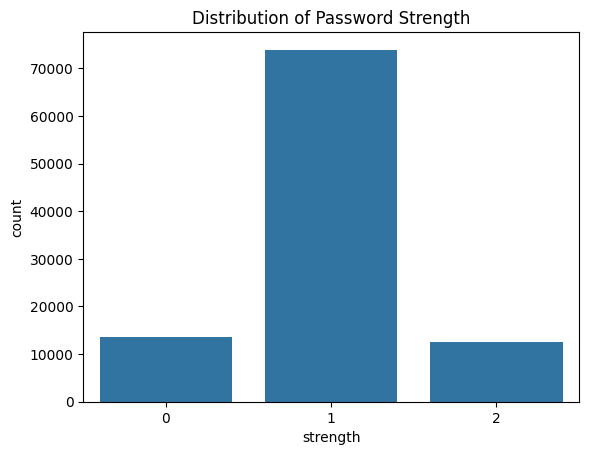

In [11]:
# Inspect Target Variable
# Assuming you have a 'strength' column with categories (Weak, Medium, Strong)
if 'strength' in df.columns:
    print("\nTarget variable distribution:")
    print(df['strength'].value_counts())

    # Visualize target distribution
    sns.countplot(data=df, x='strength')
    plt.title('Distribution of Password Strength')
    plt.show()

## **3.8 Inspect Password Column**


Password length statistics:
count    100000.000000
mean          9.986700
std           2.887813
min           1.000000
25%           8.000000
50%           9.000000
75%          11.000000
max         220.000000
Name: password_length, dtype: float64


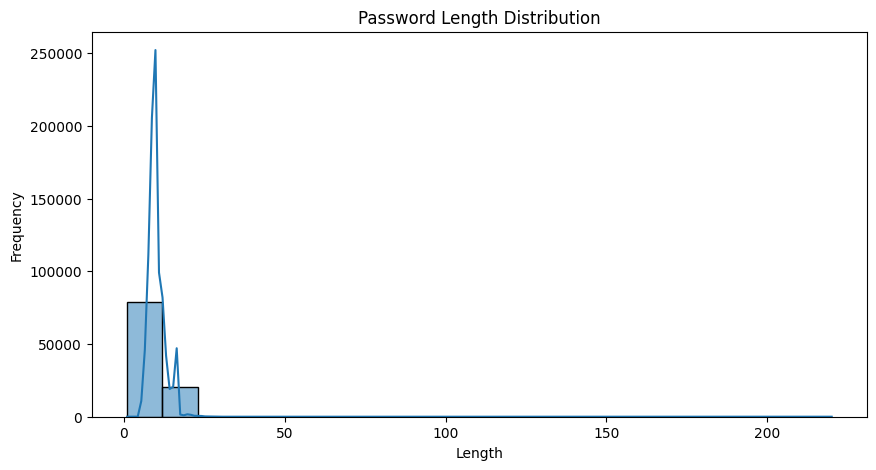

In [12]:
#Inspect Password Column
# Assuming passwords are in column 'password'
if 'password' in df.columns:
    # Password length analysis
    df['password_length'] = df['password'].apply(len)
    print("\nPassword length statistics:")
    print(df['password_length'].describe())

    # Visualize password length distribution
    plt.figure(figsize=(10,5))
    sns.histplot(df['password_length'], bins=20, kde=True)
    plt.title('Password Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

## **3.9 Check for Duplicates**

In [13]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## **3.10 Quick Feature Analysis**

In [14]:
# Quick Feature Analysis
# Count of digits, uppercase, lowercase, special chars
import re

def char_counts(password):
    digits = sum(c.isdigit() for c in password)
    upper = sum(c.isupper() for c in password)
    lower = sum(c.islower() for c in password)
    special = len(re.findall(r'[^a-zA-Z0-9]', password))
    return pd.Series([digits, upper, lower, special])

if 'password' in df.columns:
    df[['digits', 'upper', 'lower', 'special']] = df['password'].apply(char_counts)
    print("\nSample feature counts for passwords:")
    print(df[['password', 'digits', 'upper', 'lower', 'special']].head())


Sample feature counts for passwords:
                  password  digits  upper  lower  special
0                zxe870819       6      0      3        0
1             xw46454nr23l       7      0      5        0
2                soporte13       2      0      7        0
3  accounts6000webhost.com       4      0     18        1
4                 c443balg       3      0      5        0


# **4.0 Data Cleaning**

## **4.1 Drop Index Column**

In [15]:
data.drop(["index"], axis=1, inplace=True)

## **5.0 Semantic Analysis**

## **5.1 Inspect Password Data Types**

In [16]:
print(f"Type of 'password' Series: {data.password.dtype}")
print(f"Type of the first password entry: {type(data.password[0])}")

Type of 'password' Series: object
Type of the first password entry: <class 'str'>


## **5.2 Identify Numeric Passwords**

In [17]:
data["password"].str.isnumeric()

,password
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [18]:
data[data["password"].str.isnumeric()]

,password,strength,password_length,digits,upper,lower,special
12280,943801,0,6,6,0,0,0
14992,12345,0,5,5,0,0,0
20958,147856,0,6,6,0,0,0
21671,140290,0,6,6,0,0,0
23269,123987,0,6,6,0,0,0
28569,1233214,0,7,7,0,0,0
31329,0159456,0,7,7,0,0,0
32574,363761,0,6,6,0,0,0
37855,4524344,0,7,7,0,0,0
43648,5521597,0,7,7,0,0,0


## **5.3 Identify Uppercase Passwords**

In [19]:
data[data["password"].str.isupper()]

,password,strength,password_length,digits,upper,lower,special
115,EYT63119,1,8,5,3,0,0
273,INSPIRON6,1,9,1,8,0,0
338,1A2S3D4F,1,8,4,4,0,0
367,13269123A,1,9,8,1,0,0
373,YAMAZAKI82,1,10,2,8,0,0
...,...,...,...,...,...,...,...
99590,V13000993J,1,10,8,2,0,0
99692,65925013ABC,1,11,8,3,0,0
99784,01EDD055,1,8,5,3,0,0
99893,1UPONYOU,1,8,1,7,0,0


## **5.4 Identify Alphabetic Passwords**

In [20]:
data[data["password"].str.isalpha()]

,password,strength,password_length,digits,upper,lower,special
267,PomarancaÇ,1,10,0,2,8,1
1380,smgodt,0,6,0,0,6,0
3198,cuado,0,5,0,0,5,0
4560,jelsz,0,5,0,0,5,0
6380,demsxp,0,6,0,0,6,0
7803,secret,0,6,0,0,6,0
9218,caballo,0,7,0,0,7,0
11555,mhe,0,3,0,0,3,0
11667,kreedo,0,6,0,0,6,0
13645,nõmlich,0,7,0,0,7,1


## **5.5 Identify Title Case Passwords**

In [21]:
data[data["password"].str.istitle()]

,password,strength,password_length,digits,upper,lower,special
64,Hisanthoshjasika0,2,17,1,1,15,0
242,Therockrockbottom72,2,19,2,1,16,0
338,1A2S3D4F,1,8,4,4,0,0
367,13269123A,1,9,8,1,0,0
526,Csicskarozsika1,2,15,1,1,13,0
...,...,...,...,...,...,...,...
99168,1053815198M,1,11,10,1,0,0
99192,Alfranx05122023,2,15,8,1,6,0
99375,Kensington1956,2,14,4,1,9,0
99590,V13000993J,1,10,8,2,0,0


## **5.6 Check for Punctuation Characters**

In [22]:
import string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def find_semantics(row):
  for char in row:
    if char in string.punctuation:
      return 1
    else:
      pass

In [25]:
data[data["password"].apply(find_semantics) == -1]

,password,strength,password_length,digits,upper,lower,special


# **6.0 Feature Enginnering for NLP**

## **6.1 Password Length**

In [26]:
# Password length is a strong indicator of strength
df['password_length'] = df['password'].apply(len)

## **6.2 Character Composition Features**

In [27]:
# Digits, uppercase, lowercase, special chars
def char_counts(password):
    digits = sum(c.isdigit() for c in password)
    upper = sum(c.isupper() for c in password)
    lower = sum(c.islower() for c in password)
    special = len(re.findall(r'[^a-zA-Z0-9]', password))
    return pd.Series([digits, upper, lower, special])

df[['digits', 'upper', 'lower', 'special']] = df['password'].apply(char_counts)

## **6.3 Entropy Feature (Password randomness)**

In [28]:
import math
def password_entropy(password):
    # Probability of each character
    prob = [float(password.count(c)) / len(password) for c in set(password)]
    # Shannon entropy formula
    entropy = - sum([p * math.log2(p) for p in prob])
    return entropy

df['entropy'] = df['password'].apply(password_entropy)

## **6.4 Character-level N-grams**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert passwords into character-level n-grams (useful for NLP models)
# Example: 'Pass123!' -> 'Pa', 'as', 'ss', 's1', '12', '23', '3!'
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3))
X_char_ngrams = char_vectorizer.fit_transform(df['password'])

print(f"Character-level n-grams shape: {X_char_ngrams.shape}")

Character-level n-grams shape: (100000, 54332)


## **6.5 Character and Special Character Frequencies**


In [30]:
# 6.5 Character and Special Character Frequencies

# Frequency of digits, letters, and special characters relative to password length
def char_frequencies(password):
    length = len(password)
    if length == 0:
        return pd.Series([0,0,0])

    digits = sum(c.isdigit() for c in password) / length
    letters = sum(c.isalpha() for c in password) / length
    special = sum(not c.isalnum() for c in password) / length

    return pd.Series([digits, letters, special])

df[['freq_digits', 'freq_letters', 'freq_special']] = df['password'].apply(char_frequencies)

print("\nSample frequency features:")
print(df[['password', 'freq_digits', 'freq_letters', 'freq_special']].head())


Sample frequency features:
                  password  freq_digits  freq_letters  freq_special
0                zxe870819     0.666667      0.333333      0.000000
1             xw46454nr23l     0.583333      0.416667      0.000000
2                soporte13     0.222222      0.777778      0.000000
3  accounts6000webhost.com     0.173913      0.782609      0.043478
4                 c443balg     0.375000      0.625000      0.000000


In [31]:
data.head()

,password,strength,password_length,digits,upper,lower,special,entropy,freq_digits,freq_letters,freq_special
0,zxe870819,1,9,6,0,3,0,2.947703,0.666667,0.333333,0.000000
1,xw46454nr23l,1,12,7,0,5,0,3.188722,0.583333,0.416667,0.000000
2,soporte13,1,9,2,0,7,0,2.947703,0.222222,0.777778,0.000000
3,accounts6000webhost.com,2,23,4,0,18,1,3.729446,0.173913,0.782609,0.043478
4,c443balg,1,8,3,0,5,0,2.750000,0.375000,0.625000,0.000000


# **7.0 Exploratory Analysis**

## **7.1 Target Variable Analysis**


Target variable distribution:
strength
1    73883
0    13622
2    12495
Name: count, dtype: int64


/tmp/ipython-input-3293733545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='strength', palette='viridis')


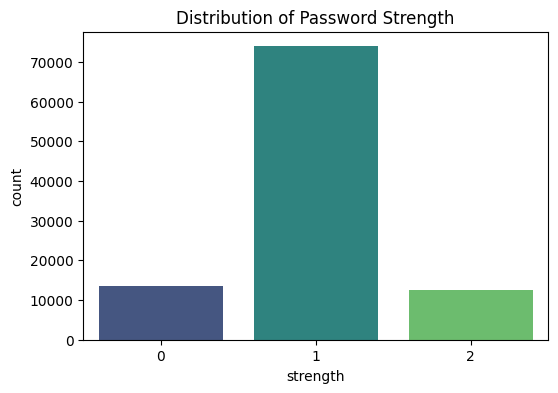

In [32]:
# Assuming 'strength' column exists
if 'strength' in df.columns:
    print("\nTarget variable distribution:")
    print(df['strength'].value_counts())

    # Visualize target distribution
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='strength', palette='viridis')
    plt.title('Distribution of Password Strength')
    plt.show()

## **7.2 Password Length Analysis**


Password length statistics:
count    100000.000000
mean          9.986700
std           2.887813
min           1.000000
25%           8.000000
50%           9.000000
75%          11.000000
max         220.000000
Name: password_length, dtype: float64


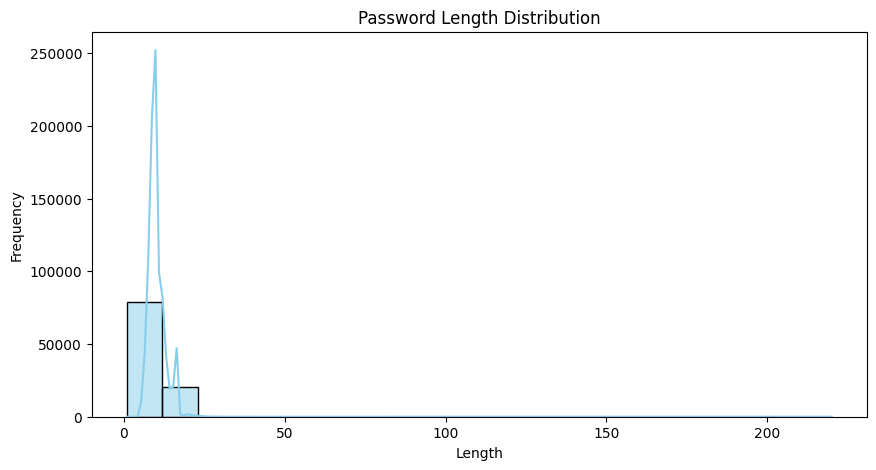

In [33]:
# 7.2 Password Length Analysis

if 'password' in df.columns:
    df['password_length'] = df['password'].apply(len)

    print("\nPassword length statistics:")
    print(df['password_length'].describe())

    # Visualize distribution
    plt.figure(figsize=(10,5))
    sns.histplot(df['password_length'], bins=20, kde=True, color='skyblue')
    plt.title('Password Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

## **7.3 Character Composition Analysis**

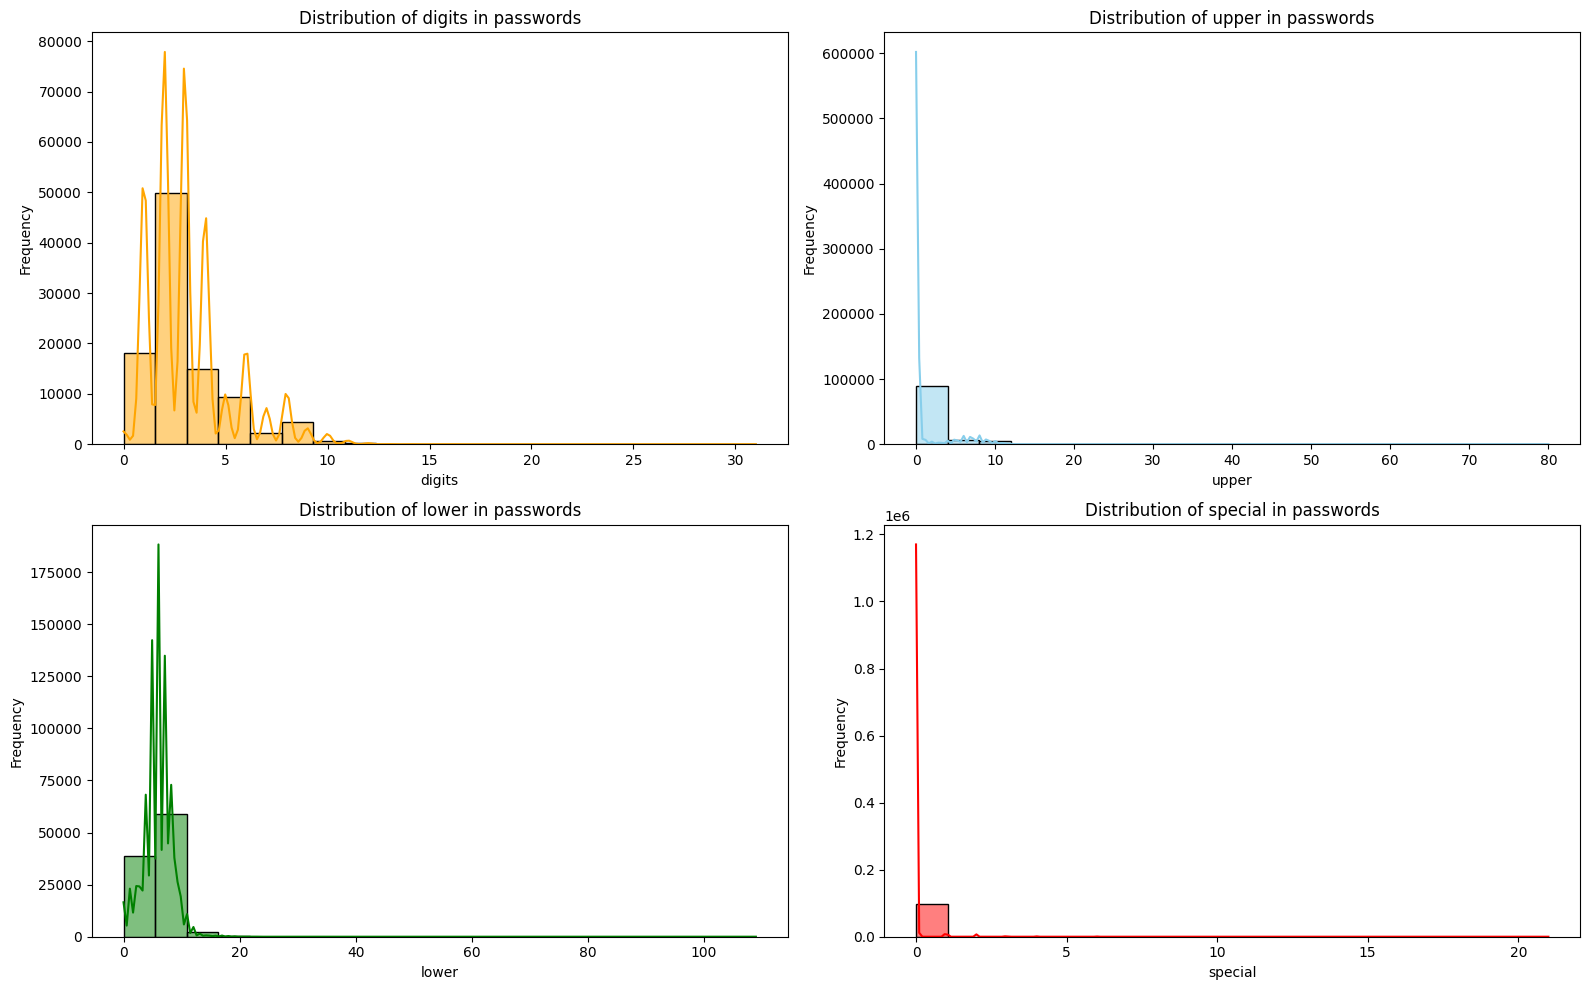

In [34]:
# 7.3 Character Composition Analysis

import re
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count character types
def char_counts(password):
    digits = sum(c.isdigit() for c in password)
    upper = sum(c.isupper() for c in password)
    lower = sum(c.islower() for c in password)
    special = len(re.findall(r'[^a-zA-Z0-9]', password))
    return pd.Series([digits, upper, lower, special])

# Apply function
df[['digits', 'upper', 'lower', 'special']] = df['password'].apply(char_counts)

# Features to visualize
features = ['digits', 'upper', 'lower', 'special']
colors = ['orange', 'skyblue', 'green', 'red']

# Plot all distributions in one figure
plt.figure(figsize=(16,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Distribution of {feature} in passwords')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **7.4 Character Frequency Analysis**

In [ ]:
def char_frequencies(password):
    length = len(password)
    if length == 0:
        return pd.Series([0,0,0])

    digits = sum(c.isdigit() for c in password) / length
    letters = sum(c.isalpha() for c in password) / length
    special = sum(not c.isalnum() for c in password) / length

    return pd.Series([digits, letters, special])

df[['freq_digits', 'freq_letters', 'freq_special']] = df['password'].apply(char_frequencies)

# Pairplot to check relationships
sns.pairplot(df[['password_length','digits','upper','lower','special','freq_digits','freq_letters','freq_special','strength']], hue='strength')
plt.show()

## **7.5 Correlation Heatmap**


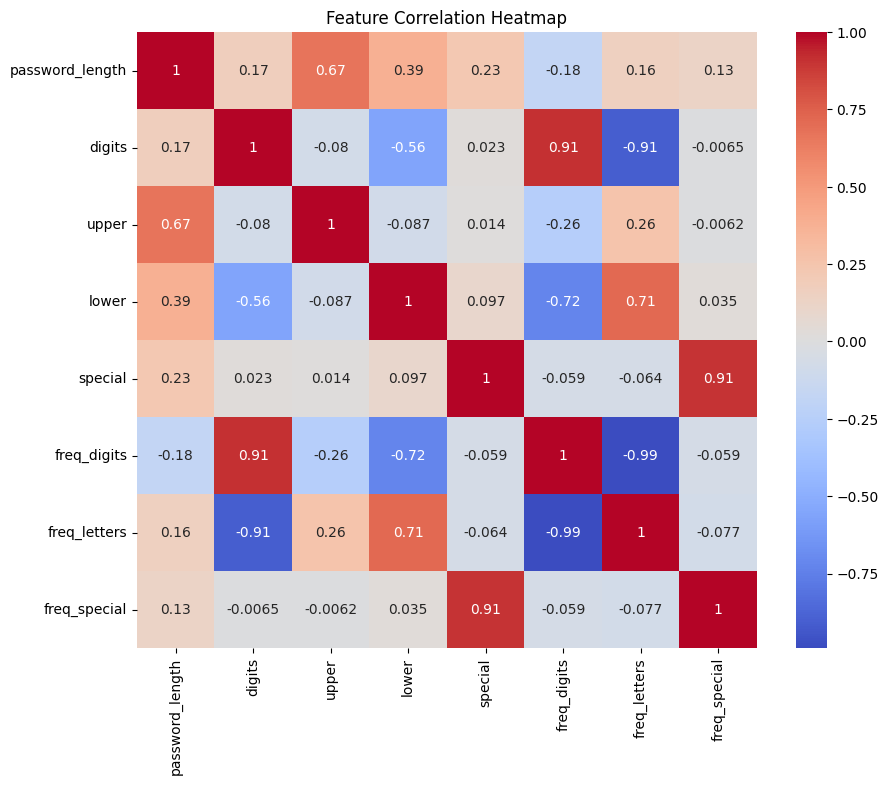

In [35]:
# 7.5 Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df[['password_length','digits','upper','lower','special','freq_digits','freq_letters','freq_special']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## **7.6 Common Patterns / Password Examples**

In [36]:
# 7.6 Common Patterns / Password Examples
# Show some extreme cases
print("\nTop 5 shortest passwords:")
print(df.nsmallest(5, 'password_length')[['password', 'password_length']])

print("\nTop 5 longest passwords:")
print(df.nlargest(5, 'password_length')[['password', 'password_length']])

print("\nSample passwords with high special character ratio:")
print(df.nlargest(5, 'freq_special')[['password','freq_special']])


Top 5 shortest passwords:
      password  password_length
96459        1                1
74938       12                2
11555      mhe                3
20313      1(R                3
58717      369                3

Top 5 longest passwords:
                                                password  password_length
40218  In0LnUoff8wfayJGqzelyDqg4AMl9gBhgl3T2iZeONzh5g...              220
92040  bV1*tB2$s$LW0$fgCqGetE$dZop9ugK7ftSl8BQu*$E4!r...              100
66648  2N8ziL2L3N!&R@s6VDTSWP33KyKlvoeCNqT1*3Ejf7rG6l...               64
90282      eH8]Ioq]aZd))sdDN0IAFvGSOJFxWW(HSUyZ>JgrYwe-M               45
69074           Password is too simple. It must be at le               40

Sample passwords with high special character ratio:
      password  freq_special
6915    ]/=[;.      1.000000
44007   ``````      1.000000
74795   (*)(^#      1.000000
80832   +%&/()      1.000000
29831  c<<<>>>      0.857143


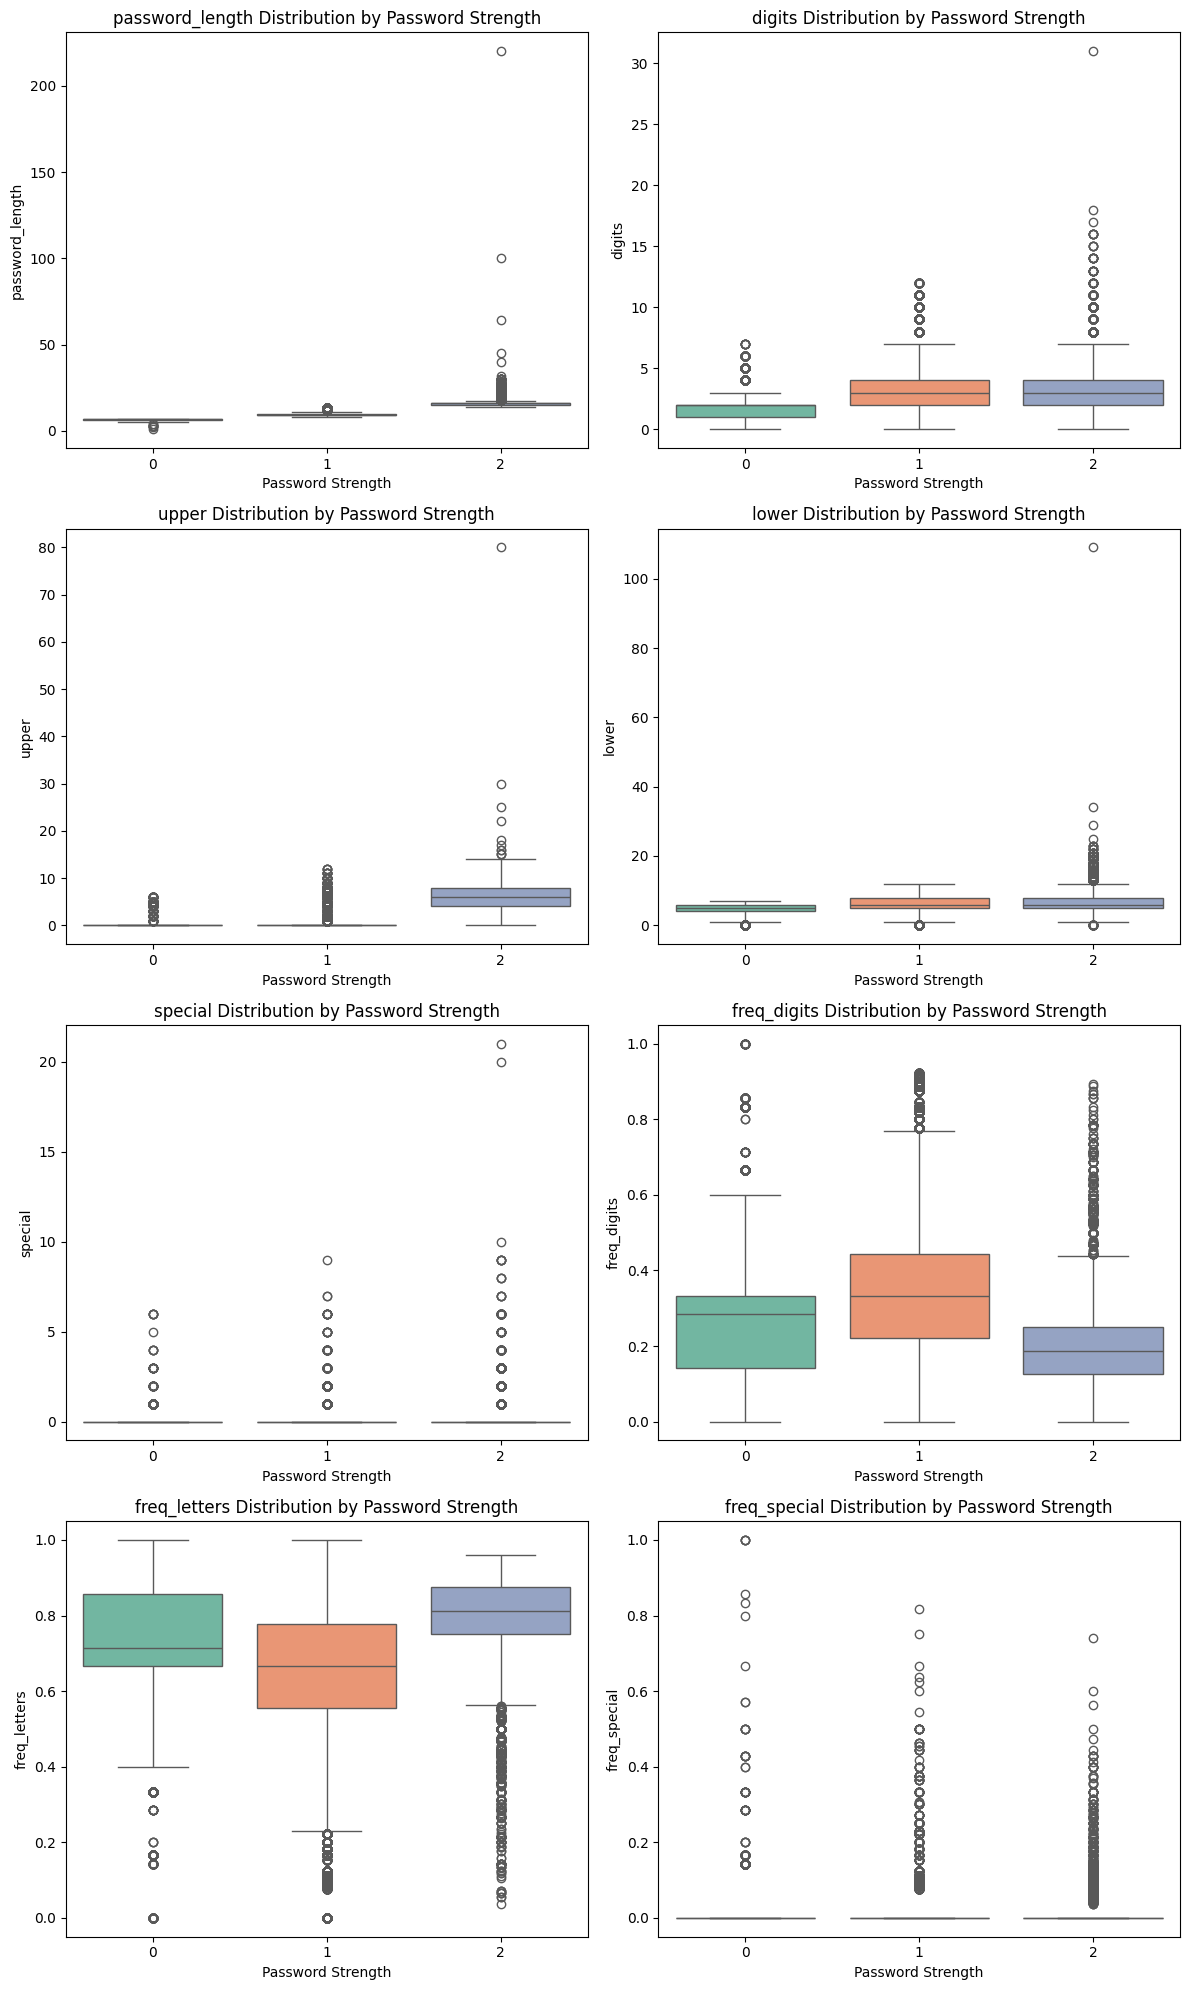

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features to visualize
features = ['password_length', 'digits', 'upper', 'lower', 'special', 'freq_digits', 'freq_letters', 'freq_special']

# Check if 'strength' column exists
if 'strength' in df.columns:
    n_features = len(features)
    n_cols = 2  # number of columns in the grid
    n_rows = (n_features + 1) // n_cols  # calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
    axes = axes.flatten()  # flatten in case of 2D array

    for i, feature in enumerate(features):
        sns.boxplot(x='strength', y=feature, data=df, hue='strength', palette='Set2', ax=axes[i], dodge=False)
        axes[i].set_title(f'{feature} Distribution by Password Strength')
        axes[i].set_xlabel('Password Strength')
        axes[i].set_ylabel(feature)
        axes[i].legend_.remove()  # remove legend for clarity

    plt.tight_layout()
    plt.show()

In [38]:
def get_dist(data, feature):
    plt.figure(figsize=(12,5))

/tmp/ipython-input-1224000742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='strength', y=feature, data=data, palette='Set2')


Text(0.5, 1.0, 'Violin Plot of freq_special by Strength')

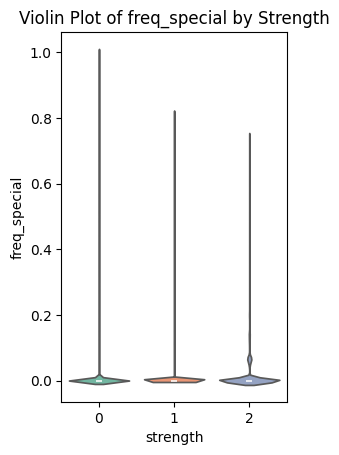

In [39]:
# Violin plot
plt.subplot(1,2,1)
sns.violinplot(x='strength', y=feature, data=data, palette='Set2')
plt.title(f'Violin Plot of {feature} by Strength')

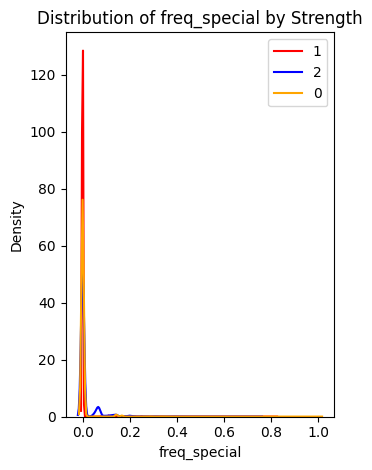

In [40]:
    # Overlapping distribution plots for each class
    plt.subplot(1,2,2)
    classes = data['strength'].unique()
    colors = ['red', 'blue', 'orange', 'green', 'purple']  # extend if more classes
    for i, cls in enumerate(classes):
        sns.kdeplot(data[data['strength']==cls][feature], color=colors[i], label=str(cls), fill=False)
    plt.title(f'Distribution of {feature} by Strength')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [41]:
# 8.2 Features to Analyze

features = ['password_length', 'digits', 'upper', 'lower', 'special', 'freq_digits', 'freq_letters', 'freq_special', 'entropy']

In [42]:
# 8.3 Plot Feature Distributions
for feature in features:
    get_dist(df, feature)

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# **8.0 TF-IDF Vectorization of Password Data**

**TF-IDF vectorization converts passwords into numbers by giving higher importance to characters that are frequent in one password but rare across all passwords.**

## **8.1 Shuffle the Dataset**

In [43]:
data.sample(frac=1)

,password,strength,password_length,digits,upper,lower,special,entropy,freq_digits,freq_letters,freq_special
47337,seth7384,1,8,4,0,4,0,3.000000,0.500000,0.500000,0.0
93538,m27071990,1,9,8,0,1,0,2.503258,0.888889,0.111111,0.0
74436,pusur69,0,7,2,0,5,0,2.521641,0.285714,0.714286,0.0
56199,CusmEMTkxMgZB8pV,2,16,1,8,7,0,3.875000,0.062500,0.937500,0.0
90751,poli93,0,6,2,0,4,0,2.584963,0.333333,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19000,sahdana1lah,1,11,1,0,10,0,2.550341,0.090909,0.909091,0.0
94648,bhulgaya1,1,9,1,0,8,0,2.947703,0.111111,0.888889,0.0
52402,dijkstra12345,1,13,5,0,8,0,3.700440,0.384615,0.615385,0.0
12484,j8rbmwj5,1,8,2,0,6,0,2.750000,0.250000,0.750000,0.0


## **8.2 Extract Password Column as a List**

In [44]:
x = list(df["password"])

## **8.3 Import TF-IDF Vectorizer**

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

## **8.4 Initialize Character-Level TF-IDF Vectorizer**

In [46]:
vectorizer = TfidfVectorizer(analyzer="char")

## **8.5 Fit and Transform Password Data**

In [47]:
X = vectorizer.fit_transform(x)

## **8.6 Check TF-IDF Matrix Shape**

In [48]:
X.shape

(100000, 99)

## **8.7 Check Original Password Column Shape**

In [49]:
df["password"].shape

(100000,)

## **8.8 View TF-IDF Sparse Matrix**

In [50]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 842571 stored elements and shape (100000, 99)>

## **8.9 Convert TF-IDF Matrix to Array**

In [51]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **8.10 View TF-IDF Values for First Password**

In [52]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27146449, 0.20826259, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31465019, 0.60976358, 0.29118163,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23495232, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38041451, 0.        , 0.35694933, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## **8.11 Display Password Column**

In [53]:
df["password"]

,password
0,zxe870819
1,xw46454nr23l
2,soporte13
3,accounts6000webhost.com
4,c443balg
...,...
99995,obejofi215
99996,fmiopvxb64
99997,czvrbun38
99998,mymyxe430


## **8.12 Count Total Extracted TF-IDF Features**

In [54]:
len(vectorizer.get_feature_names_out())

99

## **8.13 Display TF-IDF Feature Names**

In [55]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

## **8.14 Create DataFrame from TF-IDF Matrix**

In [56]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **9. Model Training and Prediction**

## **9.1 Target Variable Selection**

The target variable y is extracted from the dataset and represents the password strength labels.

In [57]:
y = df["strength"]

## **9.2 Train–Test Split**
The dataset is split into training and testing sets using an 80:20 ratio to evaluate model performance.

In [58]:
from sklearn.model_selection import train_test_split

## **9.3 Logistic Regression Model Initialization**

A multinomial Logistic Regression classifier is initialized to handle multiple password strength classes.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression(multi_class='multinomial')

## **9.4 Model Training**

The Logistic Regression model is trained using the training dataset.

In [62]:
clf.fit(X_train , y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

## **9.5 Prediction on Test Data**

Predictions are generated on the test dataset using the trained model.

In [63]:
y_pred = clf.predict(X_test)

In [64]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# **10. Feature Transformation and Sample Prediction**

In [65]:
from collections import Counter

## **10.1 Password Vectorization**

A sample password is converted into a numerical feature matrix using the pre-trained vectorizer.

In [66]:
password="%@123abcd"

In [67]:
sample_array = np.array([password])

In [68]:
sample_matrix= vectorizer.transform(sample_array)

## **10.2 Feature Matrix Inspection**

The transformed feature matrix is inspected for shape and structure.

In [89]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [90]:
sample_matrix.toarray().shape

(1, 99)

## **10.3 Password Length Analysis**

The total length of the password and the proportion of lowercase characters are calculated as additional features.

In [71]:
password

'%@123abcd'

In [72]:
len(password)

9

In [73]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [74]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [75]:
np.append(sample_matrix.toarray(), (9,0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
np.append(sample_matrix.toarray(), (9,0.444)).shape

(101,)

## **10.4 Sample Prediction Using the Model**

The trained classifier predicts the strength of the sample password based on the vectorized input.

In [77]:
new_matrix = sample_matrix

In [78]:
clf.predict(new_matrix)

array([1])

## **10.5 Custom Password Strength Prediction Function**

A reusable function is defined to:

Accept user input or function arguments

Transform the password using the vectorizer

Predict password strength

Return a human-readable strength label (weak, normal, strong)

In [80]:
def predict(password_input=None):
    if password_input is None:
        password = input("Enter a password : ")
    else:
        password = password_input

    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    # Handle division by zero for empty password
    if length_pass == 0:
        length_normalised_lowercase = 0.0
    else:
        length_normalised_lowercase = len([char for char in password if char.islower()]) / length_pass

    # The line below calculates additional features but they are not used by the current clf.predict.
    # If these features are to be used, the model needs to be retrained with them,
    # and sample_matrix should be augmented accordingly before prediction.
    # For example: augmented_sample_matrix = np.append(sample_matrix.toarray(), [[length_pass, length_normalised_lowercase]], axis=1)
    # And then call clf.predict(augmented_sample_matrix)

    result = clf.predict(sample_matrix)

    # Assuming 0: weak, 1: normal, 2: strong based on previous EDA
    if result == 0:
      return "Password is weak"
    elif result == 1:
      return "Password is normal"
    else: # result == 2
      return "Password is strong"

In [82]:
predict()

Enter a password : heelo


'Password is weak'

In [83]:
predict()

Enter a password : djjfff


'Password is weak'

# **11. Model Evaluation and Performance Metrics**

In [84]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

## **11.1 Accuracy Score**

The overall accuracy of the model is calculated using the test dataset.

In [86]:
accuracy_score(y_test, y_pred)

0.81395

## **11.2 Confusion Matrix**

A confusion matrix is generated to visualize correct and incorrect predictions across all classes.

In [87]:
confusion_matrix(y_test, y_pred)

array([[  733,  2043,     4],
       [  475, 13838,   393],
       [   10,   796,  1708]])

## **11.3 Classification Report**

A detailed classification report is produced, showing precision, recall, F1-score, and support for each password strength class.

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.26      0.37      2780
           1       0.83      0.94      0.88     14706
           2       0.81      0.68      0.74      2514

    accuracy                           0.81     20000
   macro avg       0.75      0.63      0.66     20000
weighted avg       0.80      0.81      0.79     20000

